In [4]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

path = "/home/zxy/codes/working/ICLBoom/VLMEvalKit/LMUData/"
# datasets_name = "Open_MI.tsv"
datasets_name = "CHESS_SQ.tsv"
datasets_name = "CHESS_random.tsv"
# datasets_name = "query_retrieved.tsv"

with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    # 读取第一行（标题行）
    headers = next(tsvreader)
    print("Headers:", headers)

Headers: ['index', 'question', 'answer', 'image', 'support']


index : chess_00000007
question : what is it?
answer : Rook


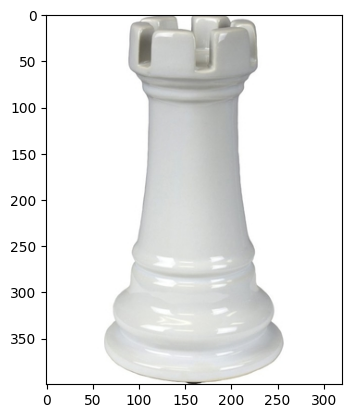

support
{'index': 'chess_00000050', 'question': 'what is it?', 'answer': 'Rook', 'image': '/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAIIA4QDAREAAhEBAxEB/8QAHgABAQEAAgMBAQEAAAAAAAAAAAUGCAkDBwoEAgH/xABkEAABAAUIBgQIBwwFCQYFBQAAAQIDBYIEERVEZKLB4QYHCBITUQk1Y5EYGSExWJWW0xQ4QVRXYdIiMnF1k6GjtMLD0dQjUnaBsxYlMzRCYnKSpBcmQ1NztSRGlKWxVmZ0svD/xAAUAQEAAAAAAAAAAAAAAAAAAAAA/8QAFBEBAAAAAAAAAAAAAAAAAAAAAP/aAAwDAQACEQMRAD8A7UwAEh/VeLACQAA1wACQ/qvFgBIAAa4ABIf1XiwAkAANcAAkP6rxYASAAGuAASH9V4sAJAADXAAJD+q8WAEgABrgAEh/VeLACQAA1wACQ/qvFgBIAAa4ABIf1XiwAkAANcAAkP6rxYASAAGuAASH9V4sAJAADXAAJD+q8WAEgABrgAEh/VeLACQAA1wACQ/qvFgBIAAa4ABIf1XiwAkAANcAAkP6rxYASAAGuAASH9V4sAJAADXAAJD+q8WAEgABrgAEh/VeLACQAA1wACQ/qvFgBIAAa4ABIf1XiwAkAANcAAkP6rxYASAAGuAAAAACQ/qvFgBIAAa4ABIf1XiwAkAANcAAkP6rxYASAAGuAASH9V4sAJAADXAAJD+q8WAEgABrgAEh/VeLACQAA1wACQ/qvFgBIAAa4

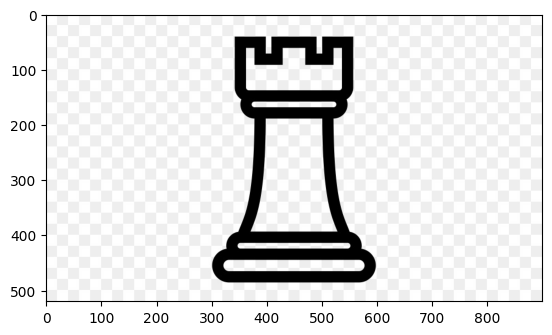

{'index': 'chess_00000139', 'question': 'what is it?', 'answer': 'Pawn', 'image': '/9j/4AAQSkZJRgABAQEBLAEsAAD/7RbQUGhvdG9zaG9wIDMuMAA4QklNA+0AAAAAABABLAAAAAEAAgEsAAAAAQACOEJJTQPzAAAAAAAJAAAAAAAAAAABADhCSU0D9QAAAAAASAAvZmYAAQBsZmYABgAAAAAAAQAvZmYAAQChmZoABgAAAAAAAQAyAAAAAQBaAAAABgAAAAAAAQA1AAAAAQAtAAAABgAAAAAAAThCSU0D+AAAAAAAcAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAA4QklNBAQAAAAAAoccAVoAAxslRxwCAAACAAQcAgUAFlRoZSBwYXduLCBjaGVzcyBwaWVjZSAcAhkABHBhd24cAhkABXBpZWNlHAIZAARnYW1lHAIZAAVjaGVzcxwCGQAHdmljdG9yeRwCGQAHc3VjY2VzcxwCGQADcmVkHAIZAARwbGF5HAIZAAhpc29sYXRlZBwCGQAHY29uY2VwdBwCGQAIc3RyYXRlZ3kcAhkABXNwb3J0HAIZAAVjb2xvchwCGQAGb2JqZWN0HAIZAAtjb21wZXRpdGlvbhwCGQAKYmFja2dyb3VuZBwCGQAFYm9hcmQcAhkADGludGVsbGlnZW5jZRwCGQAHY2xvc2V1cBwCGQAFcG93ZXIcAhkABmJhdHRsZRwCGQAJY2hhbGxlbmdlHAIZAApsZWFkZXJzaGlwHAIZAANvbmUcAhkABmRldGFpbBwCGQAFaG9iYnkcAhkACGRlY2lzaW9uHAIZAApjaGVzc2JvYXJkHAIZAAdsZWlzdXJlH

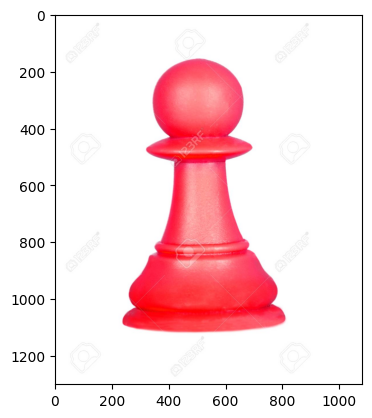

{'index': 'chess_00000106', 'question': 'what is it?', 'answer': 'King', 'image': '/9j/4AAQSkZJRgABAgEASABIAAD/4QqlRXhpZgAATU0AKgAAAAgACgEPAAIAAAASAAAAhgEQAAIAAAAKAAAAmAESAAMAAAABAAEAAAEaAAUAAAABAAAAogEbAAUAAAABAAAAqgEoAAMAAAABAAIAAAExAAIAAAAbAAAAsgEyAAIAAAAUAAAAzQITAAMAAAABAAIAAIdpAAQAAAABAAAA5AAAA3ROSUtPTiBDT1JQT1JBVElPTgBOSUtPTiBEODAAAAAASAAAAAEAAABIAAAAAUFkb2JlIFBob3Rvc2hvcCBDUyBXaW5kb3dzADIwMTE6MDE6MTkgMTE6Mjg6MzUAAAAAACeCmgAFAAAAAQAAAr6CnQAFAAAAAQAAAsaIIgADAAAAAQABAACIJwADAAAAAQKAAACQAAAHAAAABDAyMjGQAwACAAAAFAAAAs6QBAACAAAAFAAAAuKRAQAHAAAABAECAwCRAgAFAAAAAQAAAvaSBAAKAAAAAQAAAv6SBQAFAAAAAQAAAwaSBwADAAAAAQAFAACSCAADAAAAAQADAACSCQADAAAAAQAAAACSCgAFAAAAAQAAAw6ShgAHAAAALAAAAxaSkAACAAAAAzUwAACSkQACAAAAAzUwAACSkgACAAAAAzUwAACgAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAcKgAwAEAAAAAQAAAcKgBQAEAAAAAQAAA1SiFwADAAAAAQACAACjAAAHAAAAAQMAAACjAQAHAAAAAQEAAACjAgAHAAAACAAAA0KkAQADAAAAAQAAAACkAgADAAAAAQABAACkAwADAAAAAQABAACkBAAFAAAAAQAAA0qkBQADAAAAAQBLAACkBgADAAAAAQAAAACkBwADAAAAAQABAACkCAADAAAAA

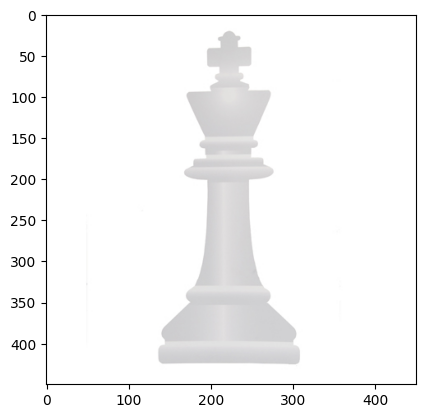

{'index': 'chess_00000012', 'question': 'what is it?', 'answer': 'Queen', 'image': '/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAGQAUADASIAAhEBAxEB/8QAHgABAAICAwEBAQAAAAAAAAAAAAcIBgkDBAUBAgr/xAA/EAACAQQCAQQBAgQEBQMDAwUBAgMABAUREiEGBxMiMUEIFCMyQlEVUmFxCRYkM4GRofBisfE0Q0QYJXJzov/EABoBAQADAQEBAAAAAAAAAAAAAAADBAUCAQb/xAA3EQABAwIEBAUCBwABBAMAAAABAAIRAyESMUFRBGFxgRMikaHwscEFIzJC0eHxUiQzYnJTgpL/2gAMAwEAAhEDEQA/AP7+KUpREpSlESlKURKUpREpSlESlKURKUpREpSlESvhOgT/AGBP/pX2vy2uJ39Ho/7fn/2oipL+pv8AUPlfC7i48E8DlW18lhx8eQ8g8jVILo+O2UqF4rSytZo5YjlLmN4Zpri4RksLWaJo4ZLiVZrXW95VcYf1Algu3k9TM1lcTZRt5tkvL/Lsh5FbG/nuAqXdlbqlvFg7M3LmCO2dAkLGOKNFZCZMa9VvUO48S/UB57feRW0mYm8X9XMpf5HFXLJ7WRsLLOm6itS7sFNvcY94I4Q54ftjbrI3BVVa94/1MfMeX+T5KGe6x9hnctkrxbQytGUs73ITX1tYXkcD+3dx2sjqqRmSSMNGjgnSVj8Tw1atXa51dzWhww0mkgYZbMkDCZtOvK5BsUnhgIDWu8uZzLtCZGl/9ur4

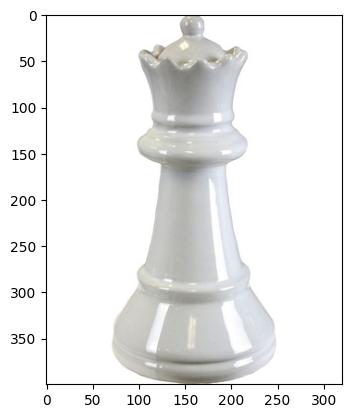

{'index': 'chess_00000047', 'question': 'what is it?', 'answer': 'Knight', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD//gA7Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2NjIpLCBxdWFsaXR5ID0gNzAK/9sAQwAKBwcIBwYKCAgICwoKCw4YEA4NDQ4dFRYRGCMfJSQiHyIhJis3LyYpNCkhIjBBMTQ5Oz4+PiUuRElDPEg3PT47/9sAQwEKCwsODQ4cEBAcOygiKDs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7/8AAEQgC0ALQAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A7U0

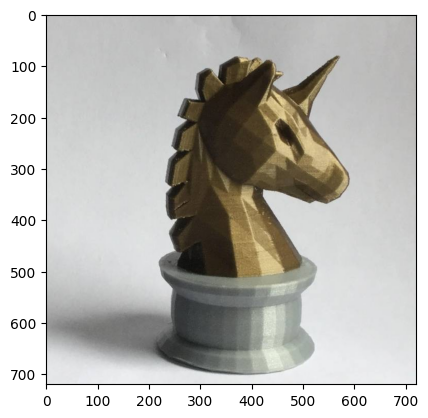

{'index': 'chess_00000214', 'question': 'what is it?', 'answer': 'Queen', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCADJALQDAREAAhEBAxEB/8QAHgABAAEEAwEBAAAAAAAAAAAAAAcEBQYIAgkKAwH/xABQEAABAwMCAgMJDQILBwUAAAABAgMEAAUGBxEIEhMhcgkUMTM2UXGRsRUiMjQ1QWF0dYGytcEjRBYkQkNSU1SCkqHDGCUnYnOEwiaDhdLj/8QAGQEBAAMBAQAAAAAAAAAAAAAAAAECAwQF/8QAKhEBAAMAAgIBAwMDBQAAAAAAAAECEQMhEjFBEyJRBDJhIzORQlJiseH/2gAMAwEAAhEDEQA/AOzG9XxuEhRKwNqDT3ix477Vw+vN2KNae/bxNiCUw4+vaMhKlOIHvUnncUFN9afeDYj3+/VQdfF649uIPOZmX5Zbc+u1pkWyzJdhd7O9G0zzXGI2Qlkfs9uR1Q3UFKPVuo7UGFxu6DcXkbb/AIx3N3b+saaV/wCNBd4vdJ+LqNt/xGQ7t/WQ2zQXaN3Ufi6j7f8Aquzu7f1lsSf1oLix3V/i3a+HdcZcH/NaB/8AagucXuuPFC0QZMfFn/8A48p9iqC8xe7CcQLO3fOJYy96EuJ/Wgu0buy+sjW3fGmWNvf9y8n9KC4sd2i1LSR3xo5j6h/y3F4f+NBdYvdpcl6u/NGYX09Hc1/qmgvETu07HV37o3J+norgk+0UF2j92oxL960dvn/tzmf1oLlH7tLpmsgSNJcpb+kS

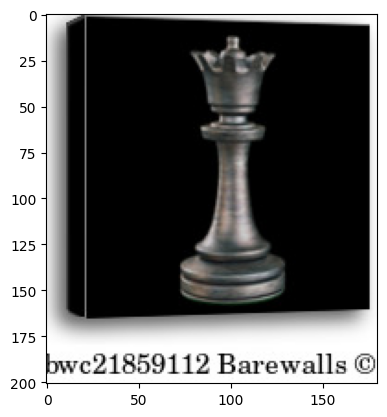

{'index': 'chess_00000042', 'question': 'what is it?', 'answer': 'King', 'image': '/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAUUA2IDASIAAhEBAxEB/8QAHAABAAIDAQEBAAAAAAAAAAAAAAIDAQQFBwYI/8QAFwEBAQEBAAAAAAAAAAAAAAAAAAECA//aAAwDAQACEAMQAAAB9UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBrbELwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVhGYykAAAAAAAAAAAAAAAAAAI4CUYluK8liEwAAAAAAAAAAAAAAAAAAAAAQIqxsgAAAAAFZnEohKJmVVpkAAAAAAAAAAAAAAAACDBmTIxkMZFeZQLEJgAAAAAAAAAAAAAAAAAAAgDBNkAAAAACsM4MWRiJRtMZAAAAAAAAAAAAAAAABCURJkxDMyvMxjMJjGRXmVZaAAAAAAAAAAAAAAAAAAVgyRsjEg2AAAAAKxiQYzkhJIyAAAAAAAAAAAAAAAAACCUCxjJGUJgEJwEo5yRxmRkAAAAAAAAAAAAAAAAArEJ5GJCOUiKYAAAArxIZxCwxCchkAAAAAAAAAAAAAAAAAAFVkCxjJiMxiEomLGRDORkAAAAAAAAAAAAAAAAAIRzkziMzEZSGQAAAFIxMJxiSjYG

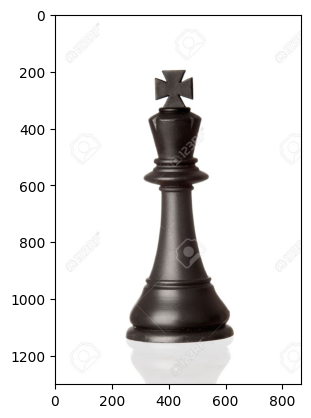

{'index': 'chess_00000004', 'question': 'what is it?', 'answer': 'King', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wAARCASTAfQDASIAAhEBAxEB/8QAHQAAAQUBAQEBAAAAAAAAAAAAAAIDBAYHAQUICf/EAFQQAAECAwQHBQUHAgQCCAUBCQIBAwAEBQYRIUMSEyIxQVLwByMzRGIUMlGB0RVCU2FxweEkkQgWobE0NRg2cnSCkqLSFyVkssLxVHNWJkaE4vKU/8QAFgEBAQEAAAAAAAAAAAAAAAAAAAEC/8QAGBEBAQEBAQAAAAAAAAAAAAAAAAEREiH/2gAMAwEAAhEDEQA/APsuCCCAIIIIAggggCCCCAIIIIAggggCCCCAIIIIAggggCCCCAIIIIAggggCCCCAIIIIAggggCCCCAIIIIAggggCCCCAIIIIAggggCCCCAIIIIAggggCCCCAIIIIAggggCCCCAIIIIAggggCCCCAIIIIAggggCCCCAIIZnnvZpJ+Y0dLVNkd3xuS+K+3akzJBSUHEkH3i4pfywFmgitJadxQQvZBxFC3lxW7ljpWlcS/+kHDT4l93/wwFkgiupaNxTQfZBxJB3lxS/lhKWmcUEL2QcRQt5cVu5YCyQRXCtK4l/8ASDhp8S+7/wCGOpaNxTQfZBxJB3lxS/lgLFBFaS0zigheyD7qFvLit3LCltKaaX9IOGnxL7v/AIYCxwRXEtI5poPsg4kg7y4pfywlLTGoIXsg+6Jby4rdywFlgiuLaVxL/wCkHDT4l

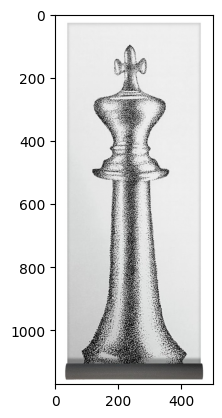

{'index': 'chess_00000177', 'question': 'what is it?', 'answer': 'Bishop', 'image': '/9j/4AAQSkZJRgABAQEASABIAAD/7QBiUGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAEYcAVoAAxslRxwCAAACAAAcAnQAMsKpIFllb1lzIC0gaHR0cDovL3d3dy5yZWRidWJibGUuY29tL2RlL3Blb3BsZS95ZW95/+0AYlBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAABGHAFaAAMbJUccAgAAAgAAHAJ0ADLCqSBZZW9ZcyAtIGh0dHA6Ly93d3cucmVkYnViYmxlLmNvbS9kZS9wZW9wbGUveWVvef/bAEMAAwICAwICAwMDAwQDAwQFCAUFBAQFCgcHBggMCgwMCwoLCw0OEhANDhEOCwsQFhARExQVFRUMDxcYFhQYEhQVFP/bAEMBAwQEBQQFCQUFCRQNCw0UFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFP/CABEIA+gC7gMBIgACEQEDEQH/xAAdAAEAAgMBAQEBAAAAAAAAAAAABAUDBgcCAQgJ/8QAGQEBAAMBAQAAAAAAAAAAAAAAAAIDBAEF/9oADAMBAAIQAxAAAAH80gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG5FVtVnJjpraXcLKTh8brPLO5sI4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAm7ZRbVyVhOwZI6s2bBInzxzXpnLYxpBLMAA

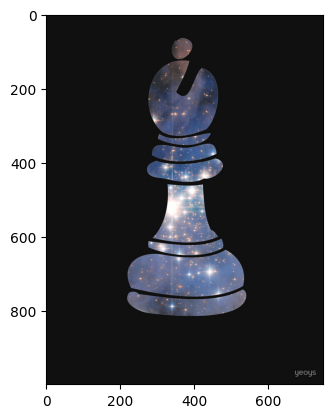

{'index': 'chess_00000017', 'question': 'what is it?', 'answer': 'Pawn', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wAARCALuAqYDASIAAhEBAxEB/8QAHQABAAEFAQEBAAAAAAAAAAAAAAQCAwUGBwEICf/EAFYQAAEDAQMHBgkGCwUHBAMBAAABAgMEBQYRBxITITFBYTZRcXSxshQiMjVzgZGh0QgVQlKCwSMzQ1NUYnKDkpPSFkSEouEkNGNko8LwJUVl4heUs/H/xAAcAQEAAgMBAQEAAAAAAAAAAAAAAgMEBQYBBwj/xAA7EQEAAgECAwMJBwQBBQEBAAAAAQIDBBEFITESQVEGE2FxgZGhsdEUIjJCweHwByNS8UMVJDNyklOi/9oADAMBAAIRAxEAPwD7LBDbaNO9qPYypc1UxRUp3qip7D3w+PdBVr/h3/ACWCJ4am6lq1/dYdoWtfuoatfstTtUCWCIlZMuyzqv/J/UPCqjdZ1T/FH/AFASwQ/CqrdZs/8AHH/Ue+EVi7KB6dMrfiBLBE01cuyib65k+B5pbR/Q4E6ahf6QJgImfaP6LTf/ALC/0HmdaX5ikT9+7+kCYCGi2ku2OkT945fuPcLSXfSp6nKBLBDzLS/PUifunL/3HujtH9JpU/cO/rAlgiaK0P0unT/Dr/WeaG0N9bD6qf8A+wEwETwes31yeqFPiPBapf8A3GVOiNnwAlgiJSVG+0qj+CP+keCTb7RqvZH/AEgSwQ/ApN9oVf8Ak/pPfAl31tWv20TsQCWMSJ4C1

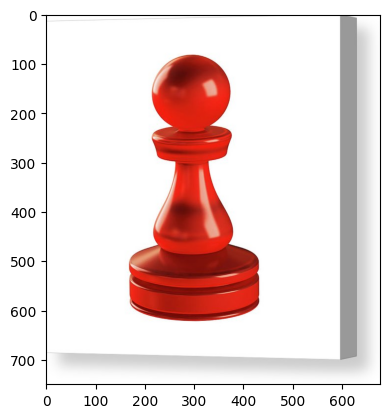

Support Counter: 10


In [5]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# path = "./datasets/clevr/"
# path = "./datasets/open_mi/"
# path = "./datasets/clevr/"
# path = path

# datasets_name = "Open_MI.tsv"
# datasets_name = "query.tsv"
# datasets_name = "query_herding_retrieved.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    support_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support")
                for item in support:
                    support_counter += 1
                    print(item)
                    print("Item ID:", item['index'])
                    print("Question:", item['question'])
                    print("Answer:", item['answer'])
                    img = item['image']
                    img = Image.open(BytesIO(base64.b64decode(img)))
                    plt.imshow(img)
                    plt.show()
                    
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break
print("Support Counter:", support_counter)

In [1]:
path = "/home/zxy/LMUData/"
datasets_name = "MME.tsv"
import csv
# Increase the field size limit
csv.field_size_limit(10000000)


with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    row_counter = 0
    categories_set = set()
    category_count = {}
    for row in tsvreader:
        # get the index of the columns
        category_index = headers.index("category")
        # question_index = headers.index("question")
        # answer_index = headers.index("answer")
        # image_index = headers.index("image")
        # print(
        #     "category: {} \n".format(
        #         # row_counter,
        #         row[category_index],
        #         # row[question_index],
        #         # row[answer_index],
        #     )
        # )
        category = row[category_index]
        categories_set.add(category)
        if category in category_count:
            category_count[category] += 1
        else:
            category_count[category] = 1
        

    print("Total categories: ", len(categories_set))
    print(category_count)

FileNotFoundError: [Errno 2] No such file or directory: '/home/zxy/LMUData/MME.tsv'

In [31]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

path = "./LMUData/"
# datasets_name = "Open_MI.tsv"
datasets_name = "Open_MI.tsv.merge"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                for key in support:
                    # image_base64 = support[key]['images']
                    # for img in image_base64:
                    #     img = Image.open(BytesIO(base64.b64decode(img)))
                    #     plt.imshow(img)
                    #     plt.show()
                    print(f"{key}: ---------\n ")
                    # for idx in support[key]['image_path']:
                    #     print(f"{idx}")
                    for img, img_path in zip(support[key]['image'], support[key]['image_path']):
                        img = Image.open(BytesIO(base64.b64decode(img)))
                        plt.imshow(img)
                        plt.show()
                        print(f"{img_path}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break

# Clevr dataset

In [ ]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import json

path = "./LMUData/"
datasets_name = "CLEVR.tsv"
datasets_name = "CLEVR_new.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)
    print(headers)
    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support ---")
                for item in support:
                    for key, value in item.items():
                        if key == "image":
                            img = Image.open(BytesIO(base64.b64decode(value)))
                            plt.imshow(img)
                            plt.show()
                        else:
                            print(f"{key}: {value}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break

# operator_induction

['index', 'question', 'answer', 'operator', 'image', 'support']
index : operator_induction_query_1_1_+
question : What is the result of the following mathematical expression?
answer : 2
operator : +


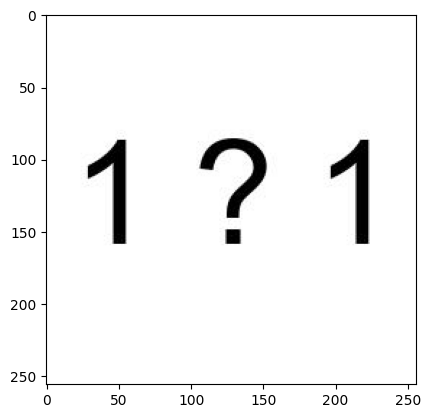

support ---
question: What is the result of the following mathematical expression?
answer: [13, 1, 42]


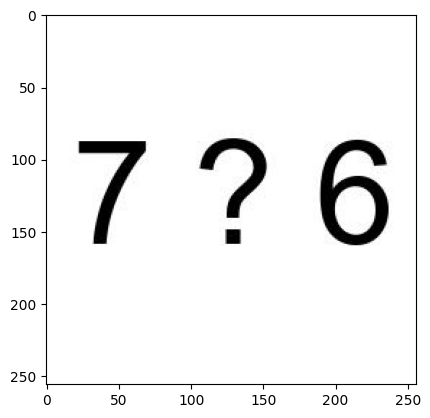

index: operator_induction_support_7_6
question: What is the result of the following mathematical expression?
answer: [8, -4, 12]


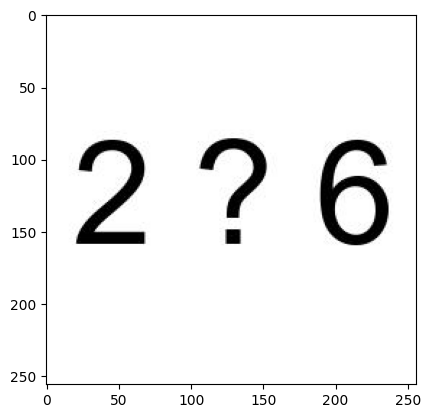

index: operator_induction_support_2_6
question: What is the result of the following mathematical expression?
answer: [12, 6, 27]


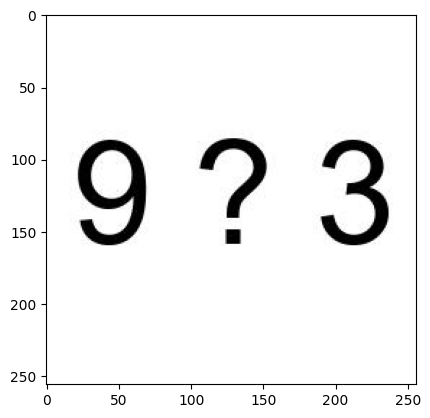

index: operator_induction_support_9_3
question: What is the result of the following mathematical expression?
answer: [11, -3, 28]


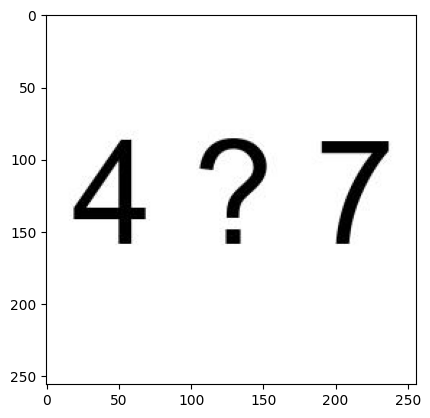

index: operator_induction_support_4_7
question: What is the result of the following mathematical expression?
answer: [11, -7, 18]


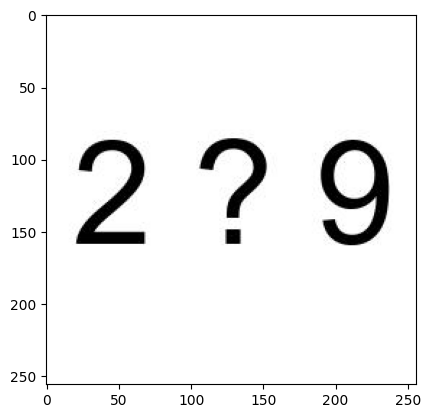

index: operator_induction_support_2_9
question: What is the result of the following mathematical expression?
answer: [11, 1, 30]


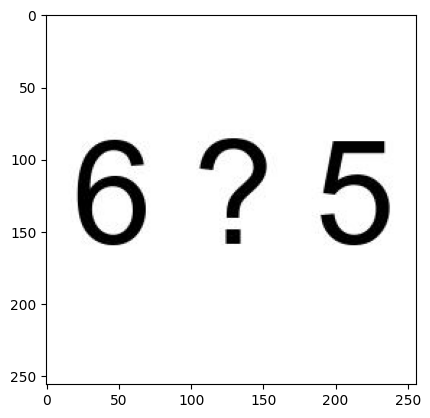

index: operator_induction_support_6_5
question: What is the result of the following mathematical expression?
answer: [5, 3, 4]


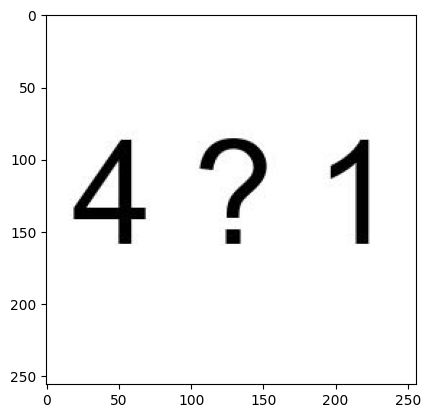

index: operator_induction_support_4_1
question: What is the result of the following mathematical expression?
answer: [13, 3, 40]


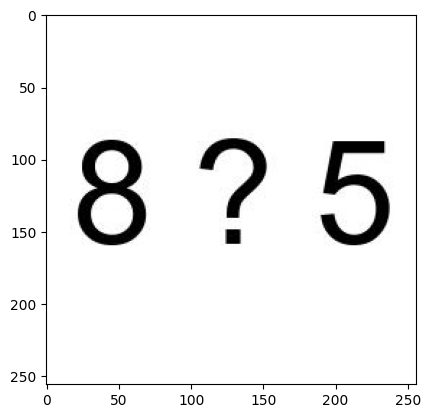

index: operator_induction_support_8_5


In [7]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import json

path = "./LMUData/"
# datasets_name = "CLEVR.tsv"
datasets_name = "operator_induction_new.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)
    print(headers)
    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support ---")
                for item in support:
                        for key, value in item.items():
                            if key == "image":
                                img = Image.open(BytesIO(base64.b64decode(value)))
                                plt.imshow(img)
                                plt.show()
                            else:
                                print(f"{key}: {value}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break